In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração da máquina (Lenovo IdeaPad S145-15IWL)
* Processador: Intel i5-8265U (8) @ 3.9Hz
* Quantidade total de núcleos: 4
* Quantidade total de threads: 8



# Informações sobre os dados na tabela

* Quantidade de processos (Em que 0 signfica sequencial)
* Quantidade de pontos: número de linhas/instâncias do dataset
* Tempo de processamento: tempo em segundos que levou o processamento

In [3]:
# Carrega o arquivo com tempos de execução
nomes_das_colunas = ['Quantidade de Processos', 'Quantidade de Pontos', "Tempo de Processamento"]
df = pd.read_csv("./log_execucao_kmeans.csv", header=None, names=nomes_das_colunas)
df

,Quantidade de Processos,Quantidade de Pontos,Tempo de Processamento
0,0,500,0.08498
1,0,500,0.08611
2,0,500,0.08735
3,0,500,0.08529
4,0,500,0.08530
...,...,...,...
95,8,100000,15.39135
96,8,100000,15.36287
97,8,100000,15.15998
98,8,100000,15.70380


# Médias dos tempos de execução (em segundos) para os processos e as quantidades de pontos
### OBS.: Quantidade de processos 0 faz referencia ao sequencial

In [4]:
df_medias = df.groupby(["Quantidade de Processos", "Quantidade de Pontos"]).median()
df_medias

Tempo de Processamento
Quantidade de Processos Quantidade de Pontos                        
0                       500                                  0.08530
                        1000                                 0.19262
                        10000                                2.80292
                        100000                              41.61052
1                       500                                  0.18536
                        1000                                 0.34064
                        10000                                4.74230
                        100000                              45.25565
2                       500                                  0.10264
                        1000                                 0.17419
                        10000                                2.70484
                        100000                              22.92253
4                       500                                  0.10463
                        1000                                 0.13713
                        10000                                1.56734
                        100000                              14.55985
8                       500                                  0.15906
                        1000                                 0.18483
                        10000                                1.70607
                        100000                              15.36287

# Graficos

### Aceleração

In [21]:
# Função para calcular a aceleração
def calc_aceleracao(row):
    dim = row.name[1]
    return df_medias.loc[0, dim]["Tempo de Processamento"] / row["Tempo de Processamento"]

# Aplicar a função de aceleração para todas as combinações de Threads e Dim (exceto sequencial)
df_medias['Aceleracao'] = df_medias.apply(calc_aceleracao, axis=1)

In [22]:
df_medias

Tempo de Processamento  \
Quantidade de Processos Quantidade de Pontos                           
0                       500                                  0.08530   
                        1000                                 0.19262   
                        10000                                2.80292   
                        100000                              41.61052   
1                       500                                  0.18536   
                        1000                                 0.34064   
                        10000                                4.74230   
                        100000                              45.25565   
2                       500                                  0.10264   
                        1000                                 0.17419   
                        10000                                2.70484   
                        100000                              22.92253   
4                       500                                  0.10463   
                        1000                                 0.13713   
                        10000                                1.56734   
                        100000                              14.55985   
8                       500                                  0.15906   
                        1000                                 0.18483   
                        10000                                1.70607   
                        100000                              15.36287   

                                              Aceleracao  
Quantidade de Processos Quantidade de Pontos              
0                       500                     1.000000  
                        1000                    1.000000  
                        10000                   1.000000  
                        100000                  1.000000  
1                       500                     0.460186  
                        1000                    0.565465  
                        10000                   0.591047  
                        100000                  0.919455  
2                       500                     0.831060  
                        1000                    1.105804  
                        10000                   1.036261  
                        100000                  1.815267  
4                       500                     0.815254  
                        1000                    1.404653  
                        10000                   1.788329  
                        100000                  2.857895  
8                       500                     0.536276  
                        1000                    1.042147  
                        10000                   1.642910  
                        100000                  2.708512

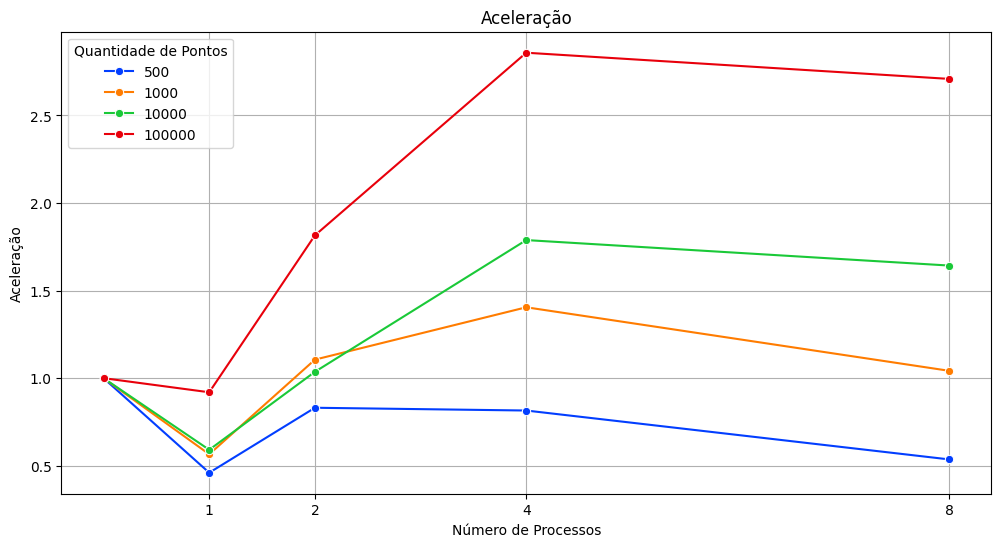

In [25]:
# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Aceleracao', hue='Quantidade de Pontos', marker='o', palette="bright")

# Configurações do gráfico
plt.title('Aceleração')
plt.xlabel('Número de Processos')
plt.ylabel('Aceleração')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()

### Eficiência

In [26]:
# Função para calcular a eficiência
def calc_efic(row):
    th = row.name[0]
    if th == 0:
        return 1
    return row["Aceleracao"] / th

In [27]:
# Aplicar a função de eficiência
df_medias['Eficiencia'] = df_medias.apply(calc_efic, axis=1)

In [28]:
df_medias

Tempo de Processamento  \
Quantidade de Processos Quantidade de Pontos                           
0                       500                                  0.08530   
                        1000                                 0.19262   
                        10000                                2.80292   
                        100000                              41.61052   
1                       500                                  0.18536   
                        1000                                 0.34064   
                        10000                                4.74230   
                        100000                              45.25565   
2                       500                                  0.10264   
                        1000                                 0.17419   
                        10000                                2.70484   
                        100000                              22.92253   
4                       500                                  0.10463   
                        1000                                 0.13713   
                        10000                                1.56734   
                        100000                              14.55985   
8                       500                                  0.15906   
                        1000                                 0.18483   
                        10000                                1.70607   
                        100000                              15.36287   

                                              Aceleracao  Eficiencia  
Quantidade de Processos Quantidade de Pontos                          
0                       500                     1.000000    1.000000  
                        1000                    1.000000    1.000000  
                        10000                   1.000000    1.000000  
                        100000                  1.000000    1.000000  
1                       500                     0.460186    0.460186  
                        1000                    0.565465    0.565465  
                        10000                   0.591047    0.591047  
                        100000                  0.919455    0.919455  
2                       500                     0.831060    0.415530  
                        1000                    1.105804    0.552902  
                        10000                   1.036261    0.518130  
                        100000                  1.815267    0.907634  
4                       500                     0.815254    0.203813  
                        1000                    1.404653    0.351163  
                        10000                   1.788329    0.447082  
                        100000                  2.857895    0.714474  
8                       500                     0.536276    0.067034  
                        1000                    1.042147    0.130268  
                        10000                   1.642910    0.205364  
                        100000                  2.708512    0.338564

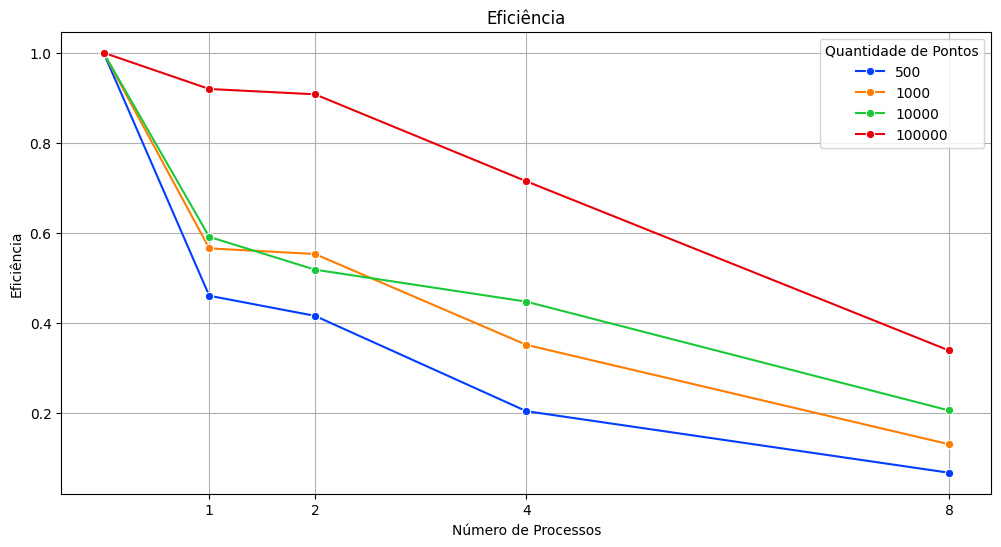

In [29]:
# Criar o gráfico de linhas com o Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Quantidade de Processos', y='Eficiencia', hue='Quantidade de Pontos', marker='o', palette="bright")

# Configurações do gráfico
plt.title('Eficiência')
plt.xlabel('Número de Processos')
plt.ylabel('Eficiência')
plt.grid(True)
plt.xticks([1, 2, 4, 8])
plt.show()